### Loading and prerequesites

In [14]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm

In [15]:
df = pd.read_csv("../Data/df_LIWC_Analysis.csv", sep="\t")

In [16]:
df

,nexis_id,title,publication_date,publisher,text,clean_text,Segment,WC,Analytic,Clout,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,Emoji
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,1,773,98.79,55.91,...,0.65,0.00,0.13,0.00,2.46,1.03,0.00,0.52,0.00,0.0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,1,702,94.37,59.20,...,0.14,0.00,0.00,0.00,2.42,8.55,0.28,0.28,0.43,0.0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,1,622,99.00,75.35,...,0.48,0.00,0.00,0.00,16.56,2.57,0.00,3.86,0.32,0.0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,1,224,99.00,66.76,...,0.00,0.00,0.00,0.00,3.57,1.79,0.00,1.79,0.00,0.0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,1,631,98.57,63.17,...,0.32,0.00,0.00,0.00,3.01,2.54,0.00,0.95,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280,67KW1VK1F15WB4660000000,Kein Titel,2023-02-21,ZEIT Wissen,6 Am anfang drei Fragen 1. Können wir andere m...,6 an anfang drei frage 1 können wir anderer mi...,1,301,80.22,78.43,...,2.66,0.00,3.99,0.00,1.66,0.66,0.33,0.00,0.33,0.0
5281,67KW1VK1F15WB46B0000000,Leben und schmecken lassen,2023-02-21,ZEIT Wissen,"Ein saftiges Filet, für das kein Huhn sterben ...",ein saftig filet für der kein huhn sterben mus...,1,263,99.00,48.81,...,1.90,0.00,0.00,0.00,4.94,1.52,0.00,0.00,0.38,0.0
5282,7W29GN20YC2460S30000000,ABSCHIED VOM ALTEN ITALIEN,2009-05-13,ZEIT Wissen,John Dickie: »Delizia! Die Italiener und ihre...,john dickie delizia der italiener und ihr kü...,1,858,97.11,75.43,...,1.75,0.00,0.23,0.23,0.82,3.26,0.00,0.00,2.91,0.0
5283,7X8DW4712SK2G0H10000000,Essen aus dem Labor,2009-12-08,ZEIT Wissen,Es ist der letzte Tag auf der Lebensmittelmess...,es sein der letzter tag auf der lebensmittelme...,1,2529,97.33,59.28,...,0.47,0.00,0.32,0.00,2.53,1.50,0.04,0.47,0.04,0.0


In [17]:
# Add year of publication to dataset
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['publication_year'] = df['publication_date'].dt.year

### Analyse Big 4

In [18]:
# Create a new dataframe to store the data for the big 4 variables
yearly_data_big_4 = pd.DataFrame()

# Group the dataframe by year and calculate the average values of each variable per year
yearly_data_big_4['Analytic'] = df.groupby('publication_year')['Analytic'].mean()
yearly_data_big_4['Clout'] = df.groupby('publication_year')['Clout'].mean()
yearly_data_big_4['Authentic'] = df.groupby('publication_year')['Authentic'].mean()
yearly_data_big_4['Tone'] = df.groupby('publication_year')['Tone'].mean()

# Rename the column publication_year to year
yearly_data_big_4.index.names = ['year']

,Analytic,Clout,Authentic,Tone
year,,,,
1992,98.600000,64.230000,23.006667,14.863333
1993,97.631667,56.501667,41.086667,35.723333
1994,97.636111,59.611111,25.945000,32.027222
1995,94.782000,59.180000,24.691000,26.333889
1996,96.485862,61.751724,23.885172,27.711429
1997,95.203673,58.928163,26.453265,36.669583
1998,94.156500,62.721167,24.252500,31.182000
1999,96.800825,63.991443,27.071856,27.188750
2000,93.621500,62.887200,29.441500,34.199368


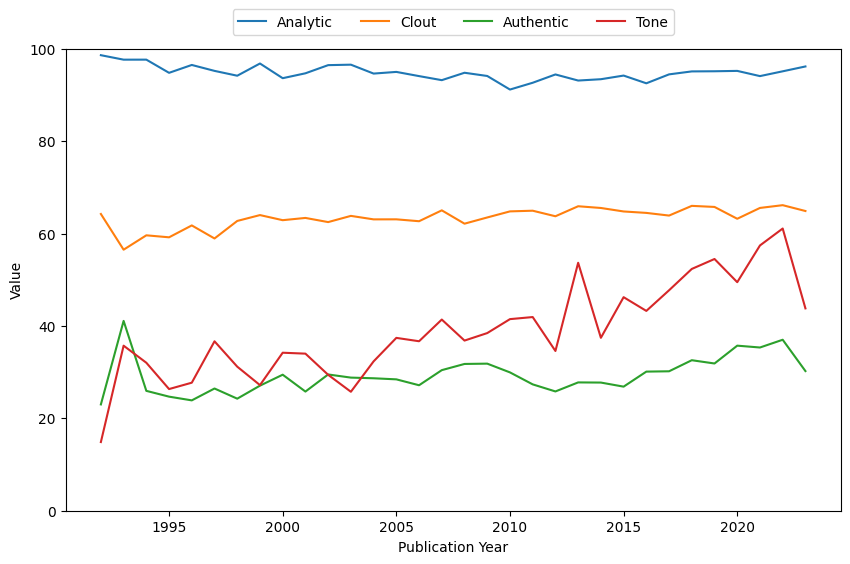

In [30]:
# Plot the data
yearly_data_big_4.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Value')
plt.ylim(0, 100)  # Set the y-axis limits
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=4)
plt.savefig('../Visuals/liwc_big_four.png')
plt.show()

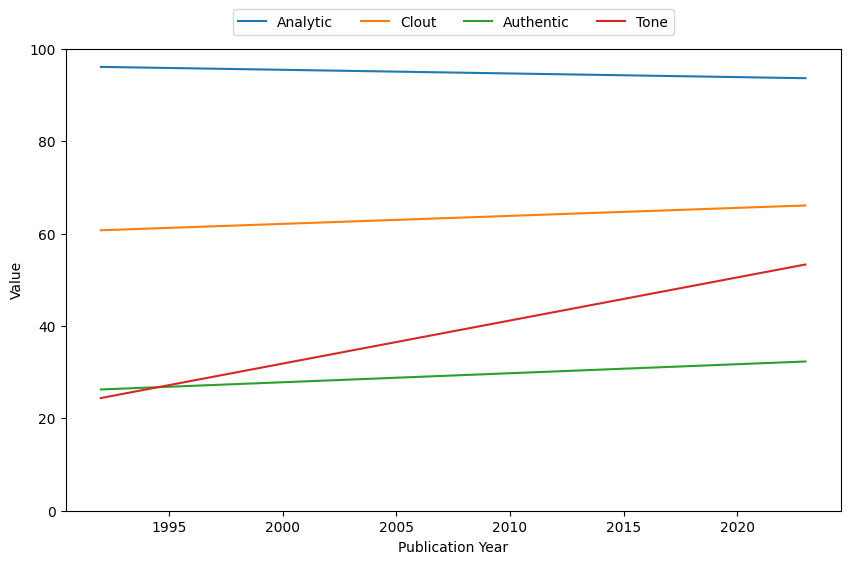

In [33]:
# Plot the regression lines
# Perform linear regression for each variable
model_analytic = sm.OLS(yearly_data_big_4['Analytic'], sm.add_constant(yearly_data_big_4.index)).fit()
model_clout = sm.OLS(yearly_data_big_4['Clout'], sm.add_constant(yearly_data_big_4.index)).fit()
model_authentic = sm.OLS(yearly_data_big_4['Authentic'], sm.add_constant(yearly_data_big_4.index)).fit()
model_tone = sm.OLS(yearly_data_big_4['Tone'], sm.add_constant(yearly_data_big_4.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(yearly_data_big_4.index, model_analytic.predict(sm.add_constant(yearly_data_big_4.index)), label='Analytic')
plt.plot(yearly_data_big_4.index, model_clout.predict(sm.add_constant(yearly_data_big_4.index)), label='Clout')
plt.plot(yearly_data_big_4.index, model_authentic.predict(sm.add_constant(yearly_data_big_4.index)), label='Authentic')
plt.plot(yearly_data_big_4.index, model_tone.predict(sm.add_constant(yearly_data_big_4.index)), label='Tone')
plt.xlabel('Publication Year')
plt.ylabel('Value')
plt.ylim(0, 100)  # Set the y-axis limits
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=4)
plt.savefig('../Visuals/liwc_big_four_regression.png')
plt.show()

### Analyse Emotion

In [35]:
# Create a new dataframe to store the data for the variables related to emotion
yearly_data_emotion = pd.DataFrame()

# Group the dataframe by year and calculate the average values of each variable per year
yearly_data_emotion['affect'] = df.groupby('publication_year')['affect'].mean()
yearly_data_emotion['posemo'] = df.groupby('publication_year')['posemo'].mean()
yearly_data_emotion['negemo'] = df.groupby('publication_year')['negemo'].mean()
yearly_data_emotion['anx'] = df.groupby('publication_year')['anx'].mean()
yearly_data_emotion['anger'] = df.groupby('publication_year')['anger'].mean()
yearly_data_emotion['sad'] = df.groupby('publication_year')['sad'].mean()

# Rename the column publication_year to year
yearly_data_emotion.index.names = ['year']

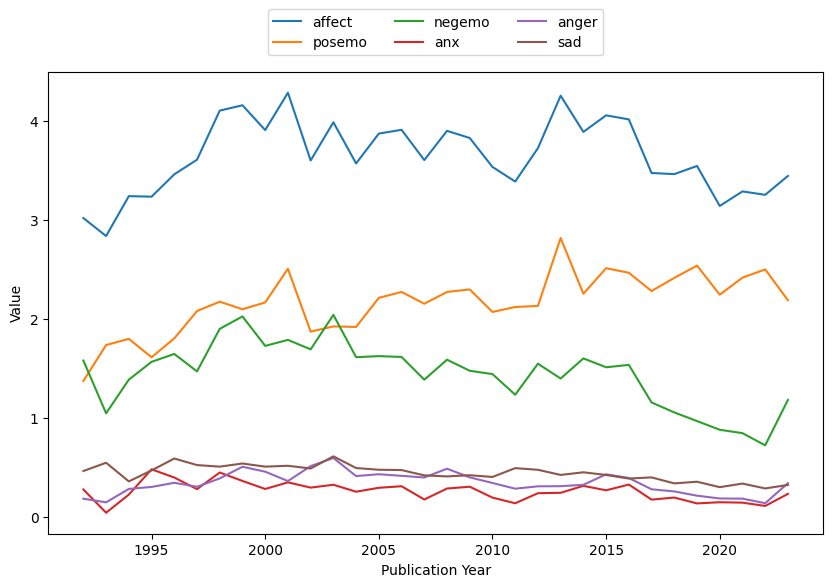

In [41]:
# Plot the data
yearly_data_emotion.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=3)
plt.savefig('../Visuals/liwc_emotion.png')
plt.show()

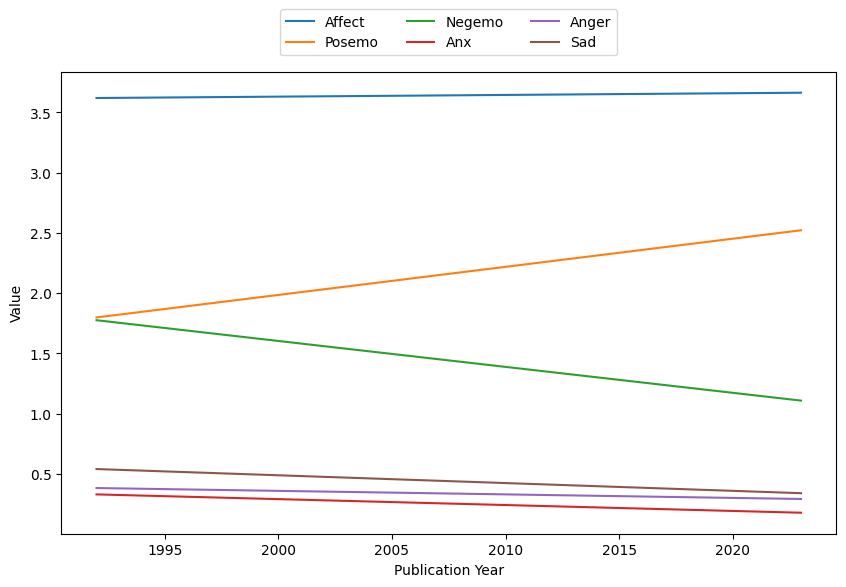

In [40]:
# Plot the regression lines
# Perform linear regression for each variable
model_affect = sm.OLS(yearly_data_emotion['affect'], sm.add_constant(yearly_data_emotion.index)).fit()
model_posemo = sm.OLS(yearly_data_emotion['posemo'], sm.add_constant(yearly_data_emotion.index)).fit()
model_negemo = sm.OLS(yearly_data_emotion['negemo'], sm.add_constant(yearly_data_emotion.index)).fit()
model_anx = sm.OLS(yearly_data_emotion['anx'], sm.add_constant(yearly_data_emotion.index)).fit()
model_anger = sm.OLS(yearly_data_emotion['anger'], sm.add_constant(yearly_data_emotion.index)).fit()
model_sad = sm.OLS(yearly_data_emotion['sad'], sm.add_constant(yearly_data_emotion.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(yearly_data_emotion.index, model_affect.predict(sm.add_constant(yearly_data_emotion.index)), label='Affect')
plt.plot(yearly_data_emotion.index, model_posemo.predict(sm.add_constant(yearly_data_emotion.index)), label='Posemo')
plt.plot(yearly_data_emotion.index, model_negemo.predict(sm.add_constant(yearly_data_emotion.index)), label='Negemo')
plt.plot(yearly_data_emotion.index, model_anx.predict(sm.add_constant(yearly_data_emotion.index)), label='Anx')
plt.plot(yearly_data_emotion.index, model_anger.predict(sm.add_constant(yearly_data_emotion.index)), label='Anger')
plt.plot(yearly_data_emotion.index, model_sad.predict(sm.add_constant(yearly_data_emotion.index)), label='Sad')
plt.xlabel('Publication Year')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=3)
plt.savefig('../Visuals/liwc_emotion_regression.png')
plt.show()
